# Brain Tumor Detection

### For Google Colab Users

In [ ]:
#@title ## Mount Your Google Drive & Map your Directory
#@markdown Please run this cell (`Ctrl+Enter` or `Shift+Enter`) and follow the steps printed bellow.
import os

from google.colab import drive
drive.mount('/content/gdrive')

# check Google Drive is mounted
if not os.path.isdir("/content/gdrive"):
  raise FileNotFoundError("Your Google Drive isn't mounted. Please run the above cell.")

assignment_dir = "/content/gdrive/MyDrive/workspace/BrainTumorDetection"  #@param{type:"string"}
assignment_dest = "/content/project"

# create symbolic link
!rm -f {assignment_dest}
!ln -s "{assignment_dir}" "{assignment_dest}"
print(f'Succesfully mapped (ln -s) "{assignment_dest}" -> "{assignment_dir}"')

# cd to linked dir
%cd -q {assignment_dest}
print(f'Succesfully changed directory (cd) to "{assignment_dest}"')

Mounted at /content/gdrive
Succesfully mapped (ln -s) "/content/project" -> "/content/gdrive/MyDrive/workspace/BrainTumorDetection"
Succesfully changed directory (cd) to "/content/project"


### Init

In [1]:
#@title ##Init

#@markdown Import required modules and observe your resources

# auto reload
%load_ext autoreload
%autoreload 2

# import
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import random
import os
import wandb
wandb.login()

from experiment import Experiment
from network import get_model

# Show resources
!nvidia-smi

wandb: Currently logged in as: sgvdan (use `wandb login --relogin` to force relogin)


Wed Jun 30 20:54:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.102.04   Driver Version: 450.102.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:85:00.0 Off |                    0 |
| N/A   41C    P0    42W / 300W |      0MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Experiment

In [2]:
# params
config = {
"model_name": "vgg19",
"data_train_path": os.path.join(".", "Data", "Training"),
"data_test_path": os.path.join(".", "Data", "Testing"),
"epochs": 3,
"train_batch_size": 200,
"lr": 1e-4,
"heatmap_batch_size": 1,
"occlusion_size": (60,60),
"heat_layers" : [2],
"shuffle_data": True,
"device": "cuda"
}

experiment = Experiment(config)
# train
with wandb.init(project="BrainTumorDetection", config=config):
    experiment.train_model()
    heat_map = experiment.generate_heatmap(r"./Data/Testing/glioma_tumor/image.jpg")

ERROR! Session/line number was not unique in database. History logging moved to new session 12


  0%|          | 0/3 [00:00<?, ?it/s]/home/labs/waic/sgvdan/.conda/envs/segev-workspace/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|██████████| 3/3 [02:55<00:00, 58.54s/it]


Train/accuracy/no,1.0
_runtime,540
_timestamp,1625076227
_step,65850
Train/accuracy/yes,1.0
Train/accuracy,1.0
Train/loss,0.00443
Test/accuracy/no,0.96429
Test/accuracy/yes,0.94444
Test/accuracy,0.95
memory/usage,2197.94336


Train/accuracy/no,▂▁██▄▃▆▇▆██▇▇██▇██████▇█████████████████
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
Train/accuracy/yes,▅█▁▂▇██▇█▇███▇██▇███████████████████████
Train/accuracy,▁▃▁▂▄▄▆▆▆▇█▇▇▇▇▇▇█████▇█████████████████
Train/loss,▆▆█▆▅▅▅▄▃▂▂▂▂▃▂▂▂▁▁▁▂▁▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁
Test/accuracy/no,▁█▇▄▄▆▇▇▇▇▆▇▇▇▇██▇█▇▇▇██████████████████
Test/accuracy/yes,█▁▁▅▇▆▅▄▄▄▆▆▄▅▅▅▆▆▆▆▆▇▆▇▆▇▆▆▇██▇▇██▇▆▇▇█
Test/accuracy,▆▁▁▄▆▅▅▄▃▄▅▅▃▅▅▅▆▆▆▆▆▆▆▇▆▇▆▆▇██▇▇██▇▆▇▇█
memory/usage,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


memory/usage,2263.94336
_runtime,359
_timestamp,1625078257
_step,65535


memory/usage,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


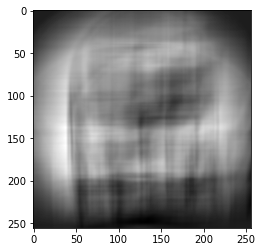

In [49]:
with wandb.init(project="BrainTumorDetection", config=config):
    heat_map = experiment.generate_heatmap(r"./Data/Testing/glioma_tumor/image.jpg")
    plt.imshow(heat_map.cpu(), cmap="gray")

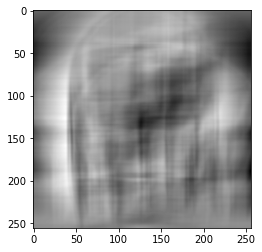

In [50]:
plt.imshow(torch.nn.functional.normalize(heat_map.cpu()), cmap="gray")